# TITANIC SURVIVAL PREDICTION

**ASTERISC TECHNOCRAT**

**TASK 1 - Titanic Survival Prediction**

**Soumalya Bhattacharyya - Data Science Intern**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## Load Data

In [2]:
# Load the training data
train_data = pd.read_csv('train.csv')

# Load the test data
test_data = pd.read_csv('test.csv')

In [3]:
# Combine train and test data for preprocessing
combined_data = pd.concat([train_data, test_data], axis=0)

In [4]:
combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [5]:
# Drop irrelevant columns
combined_data = combined_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
combined_data['Sex'] = label_encoder.fit_transform(combined_data['Sex'])

In [7]:
# Fill missing values in 'Age' and 'Fare' with their respective medians
combined_data['Age'].fillna(combined_data['Age'].median(), inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].median(), inplace=True)

In [8]:
# Split the combined data back into train and test sets
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):].copy()

In [9]:
# Split the train_data into features (X) and target (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

##  Model Training

In [11]:
# Train the model (XGBoost classifier in this example)
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
# Make predictions on the validation set
val_predictions = model.predict(X_val)

## Evaluation

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8100558659217877


**The model achieved an accuracy of approximately 81% on the validation dataset. This accuracy score represents the percentage of correctly predicted survival outcomes on the validation data.**

In [14]:
# Preprocess the test data
test_data_processed = test_data.drop('Survived', axis=1)


In [15]:
# Add 'PassengerId' column back to the test_data DataFrame
test_data.loc[:, 'PassengerId'] = pd.read_csv('test.csv')['PassengerId'].values

## Make predictions

In [16]:
# Make predictions on the test set
test_predictions = model.predict(test_data_processed)

In [17]:
# Save the test predictions to a CSV file
test_data[test_data.columns[test_data.columns.get_loc('Survived')]] = test_predictions
test_data[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)

## Some Visualisations

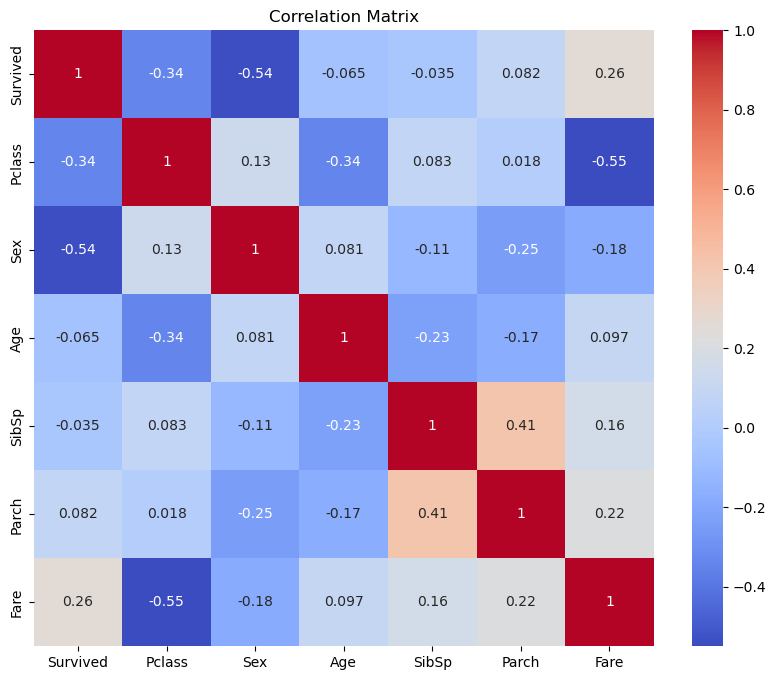

In [18]:
# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Survived and Pclass have a negative correlation (-0.34), indicating that as the passenger class (Pclass) increases, the likelihood of survival decreases. Higher class values correspond to lower socioeconomic classes**

**Survived and Sex have a strong negative correlation (-0.54), indicating that being female (coded as 1) is associated with a higher chance of survival compared to being male (coded as 0).**

**Survived and Age have a weak negative correlation (-0.065), suggesting that younger passengers had a slightly higher chance of survival.**

**Survived and SibSp (number of siblings/spouses aboard) have a weak negative correlation (-0.035), implying that a higher number of siblings/spouses was associated with a slightly lower chance of survival.**

**Survived and Parch (number of parents/children aboard) have a weak positive correlation (0.082), indicating that having a higher number of parents/children aboard was associated with a slightly higher chance of survival.**

**Survived and Fare have a moderate positive correlation (0.26), suggesting that passengers who paid higher fares had a higher chance of survival.**

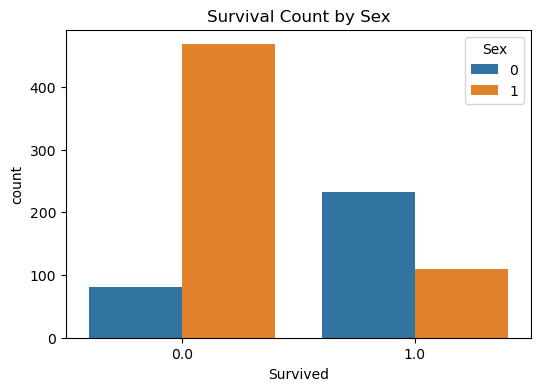

In [19]:
# Bar plot for survival by sex
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title("Survival Count by Sex")
plt.show()

**female (coded as 1) is associated with a higher chance of survival compared to being male (coded as 0)**

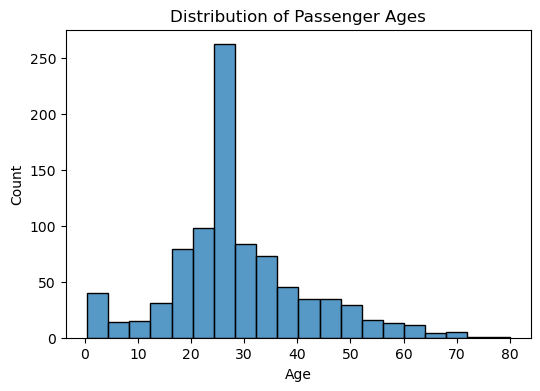

In [20]:
# Histogram of passenger ages
plt.figure(figsize=(6, 4))
sns.histplot(data=train_data, x='Age', bins=20)
plt.title("Distribution of Passenger Ages")
plt.show()

**Passenger with age near to 25 are more than 250 compare to others ages passengers**

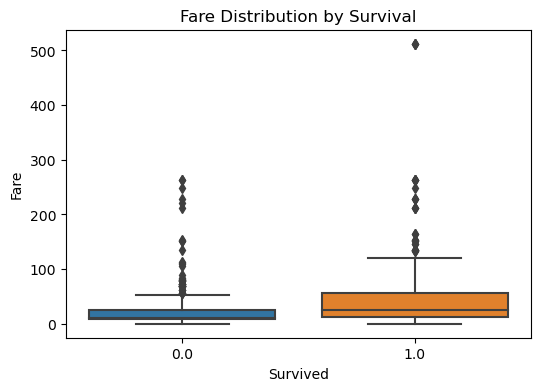

In [21]:
# Box plot of fare by survival
plt.figure(figsize=(6, 4))
sns.boxplot(data=train_data, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival")
plt.show()

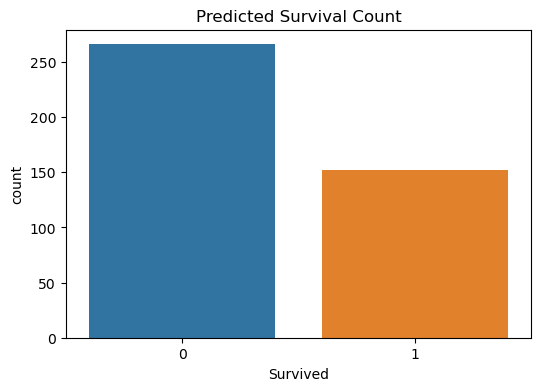

In [22]:
# Load the predictions data
predictions_data = pd.read_csv('predictions.csv')

# Bar plot for predicted survival
plt.figure(figsize=(6, 4))
sns.countplot(data=predictions_data, x='Survived')
plt.title("Predicted Survival Count")
plt.show()

**The prediction data shows that near to 150 passangers have chances to survive**

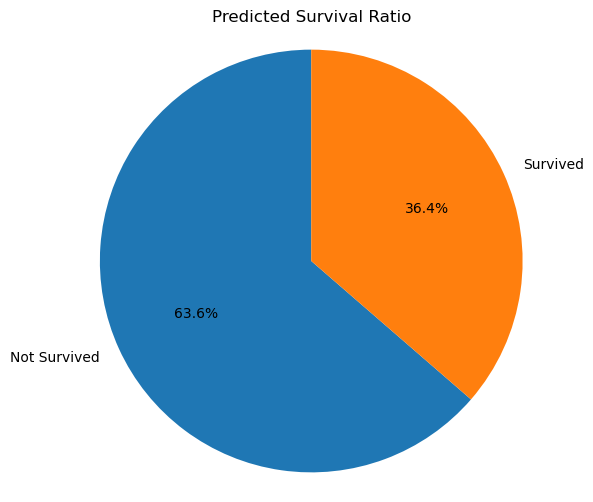

In [23]:
# Pie chart for predicted survival ratio
plt.figure(figsize=(6, 6))
survival_counts = predictions_data['Survived'].value_counts()
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("Predicted Survival Ratio")
plt.axis('equal')
plt.show()

**In this pie chart its shows that 36.4% passengers have chances to survive and 63.6% passengers have less changes of survival**